In [1]:
!pip install tensorflow==2.11.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-gelmx8ik
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-gelmx8ik
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit ce29510c83d924561c9e6054641d02a5abdeaaf5
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431853 sha256=2c046ca5ce86a05a18894cc1f2aee96a5d0a4968b2ce8def728550a38fa7f3a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-v48bozb9/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph


In [4]:
import pandas as pd
from stellargraph import StellarGraph

In [5]:
df_edges = pd.read_csv('/content/drive/MyDrive/graph_ISB_edges.csv', index_col=0)
df_edges

,source,target
0,0,0
1,0,1
2,0,2
3,0,17
4,0,19
...,...,...
153688,1103,1103
153689,1106,1106
153690,1109,1109
153691,1114,1114


In [6]:
node_features_df = pd.read_csv('/content/drive/MyDrive/node_features_hashtag_df.csv')
node_features_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
1,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
2,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
3,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
4,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
1226,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
1227,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732
1228,-0.189092,-0.059448,0.036934,-0.163505,0.014944,-0.042785,0.065283,0.223801,-0.252894,-0.190002,...,0.072798,0.023225,0.068635,-0.076926,0.118267,-0.121892,-0.053214,-0.071568,0.132806,0.221732


In [7]:
G = StellarGraph(node_features_df, df_edges)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 1230, Edges: 153693

 Node types:
  default: [1230]
    Features: float32 vector, length 768
    Edge types: default-default->default

 Edge types:
    default-default->default: [153693]
        Weights: all 1 (default)
        Features: none


In [8]:
G.check_graph_for_ml(features=True)

In [9]:
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

<div class="alert alert-block alert-danger">This notebook is designed for an older StellarGraph version 1.2.1 and may not function correctly with the newer installed version 1.3.0b. Please see: <a href="https://github.com/stellargraph/stellargraph/issues/1172">https://github.com/stellargraph/stellargraph/issues/1172</a>.</div>

<ipython-input-9-9f0eb37542e2>:4: DeprecationWarning: This notebook is designed for an older StellarGraph version 1.2.1 and may not function correctly with the newer installed version 1.3.0b. Please see: <https://github.com/stellargraph/stellargraph/issues/1172>.
  sg.utils.validate_notebook_version("1.2.1")


In [10]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

import numpy as np

In [11]:
fullbatch_generator = FullBatchNodeGenerator(G, sparse=False)
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)

corrupted_generator = CorruptedGenerator(fullbatch_generator)
gen = corrupted_generator.flow(G.nodes())

Using GCN (local pooling) filters...


In [12]:
infomax = DeepGraphInfomax(gcn_model, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))

In [13]:
epochs = 500

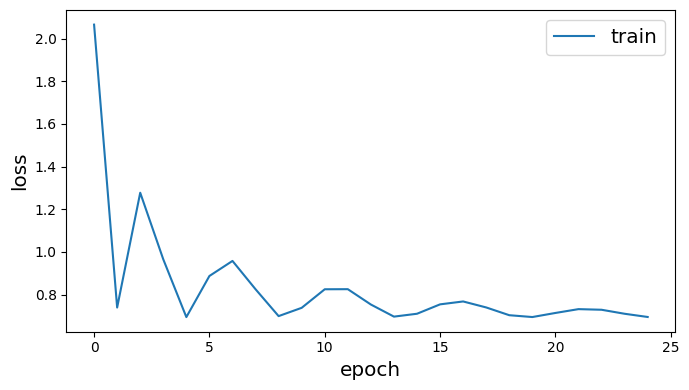

In [14]:
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])
plot_history(history)

In [15]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)

In [16]:
all_embeddings = emb_model.predict(fullbatch_generator.flow(G.nodes()))
print(type(all_embeddings))
np.shape(all_embeddings)

1/1 [==============================] - 0s 184ms/step
<class 'numpy.ndarray'>


(1230, 128)

In [17]:
np.save('/content/drive/MyDrive/hashtag_node_embeddings_GCN.npy', all_embeddings)